hello world


In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

data = pd.read_csv("MBA.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


#### checking for duplicates and null values in data

In [94]:
# number of duplicates
print(data.duplicated().sum())

# number of null values
print(data.isna().sum())

0
application_id       0
gender               0
international        0
gpa                  0
major                0
race              1842
gmat                 0
work_exp             0
work_industry        0
admission         5194
dtype: int64


#### Data cleaning

In [95]:
data['admission'] = data['admission'].fillna('Not Confirmed')
data['race'] = data['race'].fillna('Unknown')
data.drop('application_id',axis=1,inplace=True)
data

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,Not Confirmed
2,Female,True,3.30,Business,Unknown,710.0,5.0,Technology,Admit
3,Male,False,3.47,STEM,Black,690.0,6.0,Technology,Not Confirmed
4,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,Not Confirmed
...,...,...,...,...,...,...,...,...,...
6189,Male,False,3.49,Business,White,640.0,5.0,Other,Not Confirmed
6190,Male,False,3.18,STEM,Black,670.0,4.0,Consulting,Not Confirmed
6191,Female,True,3.22,Business,Unknown,680.0,5.0,Health Care,Admit
6192,Male,True,3.36,Business,Unknown,590.0,5.0,Other,Not Confirmed


##### Basic analysis of data

In [96]:
data.describe()

,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


<Axes: >

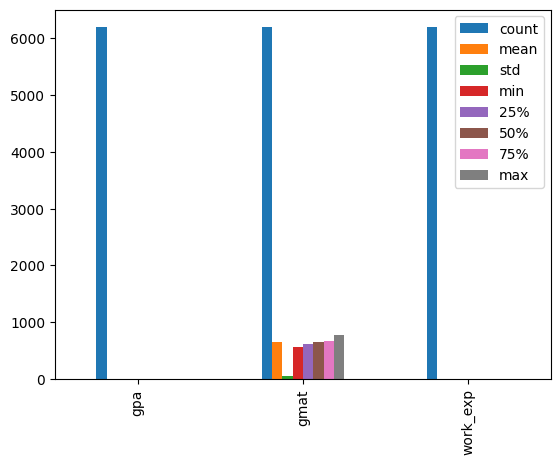

In [97]:
data.describe().T.plot(kind='bar')

## Univariate analysis

#### plotting countplot of Gender

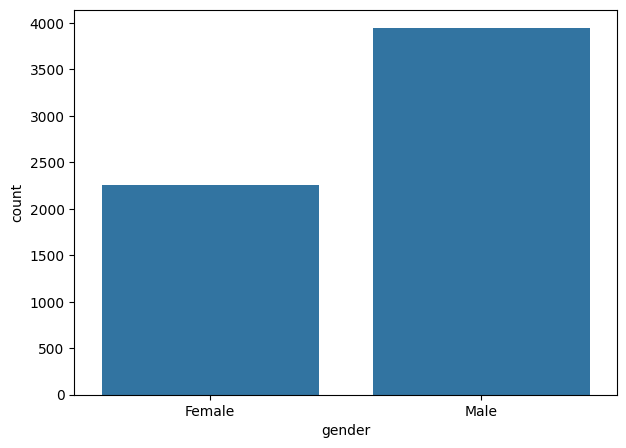

Mode: Male - 3943


In [98]:
plt.figure(figsize=(7,5))
sns.countplot(x='gender',data=data)
plt.show()

# calculating mode

values_gender = data['gender'].value_counts()
mode = data['gender'].mode()[0]
print(f"Mode: {mode} - {values_gender[mode]}")

#### plotting countplot of international (yes or no)

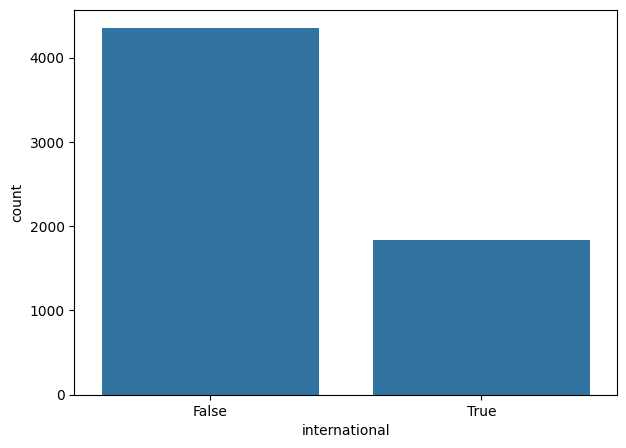

Mode: False - 4352


In [99]:
plt.figure(figsize=(7,5))
sns.countplot(x='international',data=data)
plt.show()

# calculating mode

values_international = data['international'].value_counts()
mode = data['international'].mode()[0]
print(f"Mode: {mode} - {values_international[mode]}")

#### plotting countplot of Major

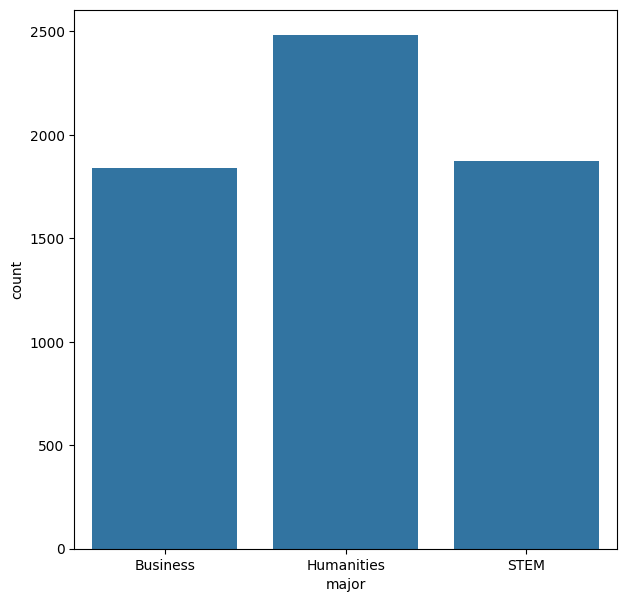

Mode: Humanities - 2481


In [100]:
plt.figure(figsize=(7,7))
sns.countplot(x='major',data=data)
plt.show()

# calculating mode

values_major = data['major'].value_counts()
mode = data['major'].mode()[0]
print(f"Mode: {mode} - {values_major[mode]}")

#### plotting countplot of race


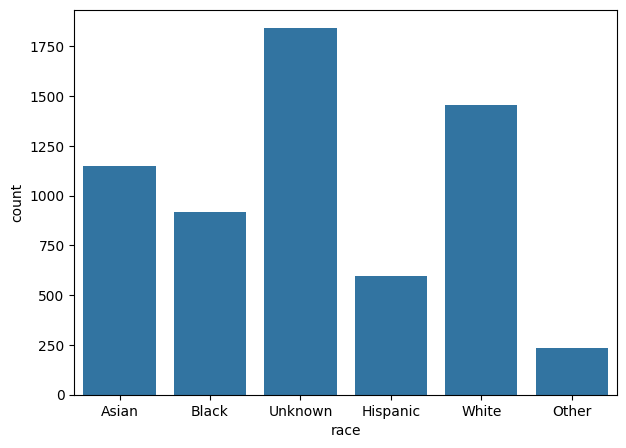

Mode: Unknown - 1842


In [101]:
plt.figure(figsize=(7,5))
sns.countplot(x='race',data=data)
plt.show()

# calcualting mode

values_race = data['race'].value_counts()
mode = data['race'].mode()[0]
print(f"Mode: {mode} - {values_race[mode]}")

#### plotting countplot of work industry

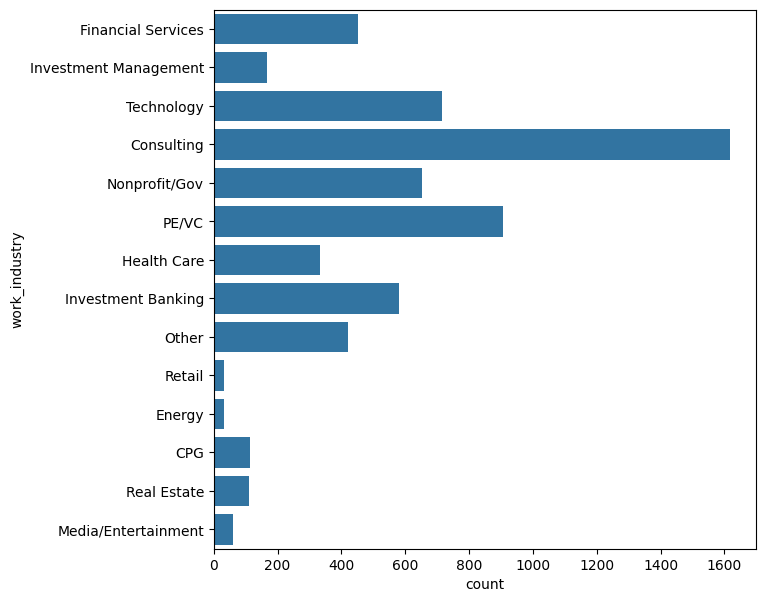

Mode: Consulting - 1619


In [102]:
plt.figure(figsize=(7,7))
sns.countplot(y='work_industry',data=data)
plt.show()

# calculating mode

values_work_industry = data['work_industry'].value_counts()
mode = data['work_industry'].mode()[0]
print(f"Mode: {mode} - {values_work_industry[mode]}")

#### plotting countplot for Admission 

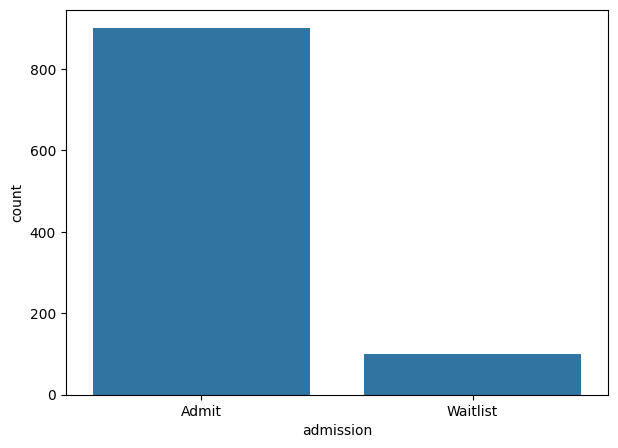

Mode: Admit - 900


In [118]:
plt.figure(figsize=(7,5))
sns.countplot(x='admission',data=data)
plt.show()

# calculating mode

values_admission = data['admission'].value_counts()
mode = data['admission'].mode()[0]
print(f"Mode: {mode} - {values_admission[mode]}")

#### plotting histogram for GPA value

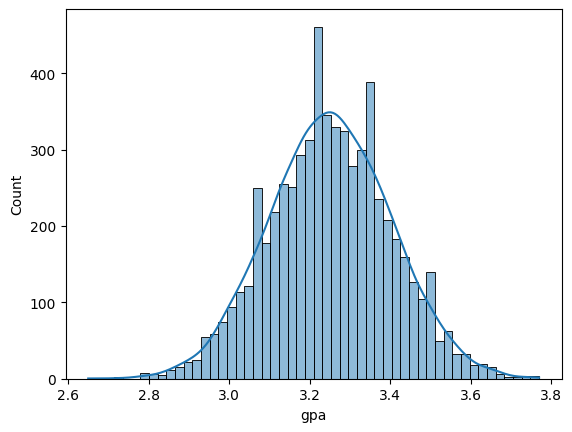

In [116]:
sns.histplot(x='gpa',data=data,kde=True)
plt.show()

#### plottig histogram for GMAT

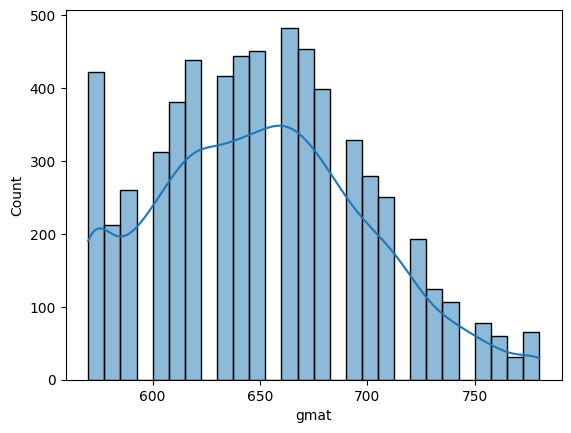

In [117]:
sns.histplot(x='gmat',data=data,kde=True)
plt.show()

#### Barplot for international students ratio

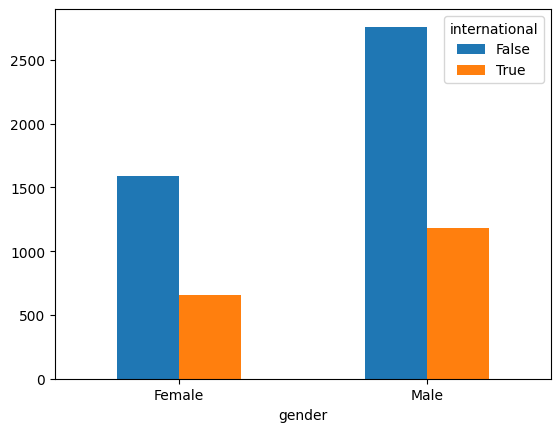

In [104]:
crosstab = pd.crosstab(data['gender'],data['international'])
crosstab.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

#### barplot for gender ratio in major

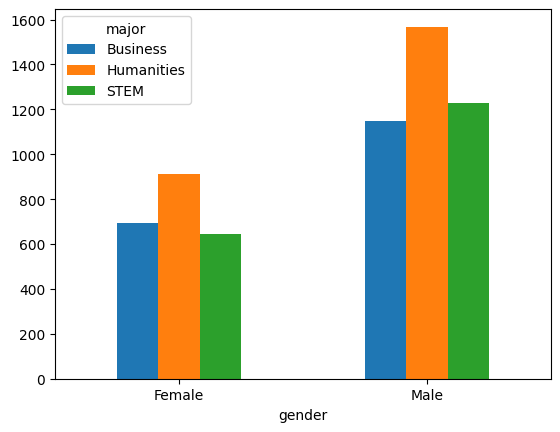

In [105]:
crosstab = pd.crosstab(data['gender'],data['major'])
crosstab.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

## Multivariate analysis

### 1. Numercial & Numerical analysis
#### correlation heatmap

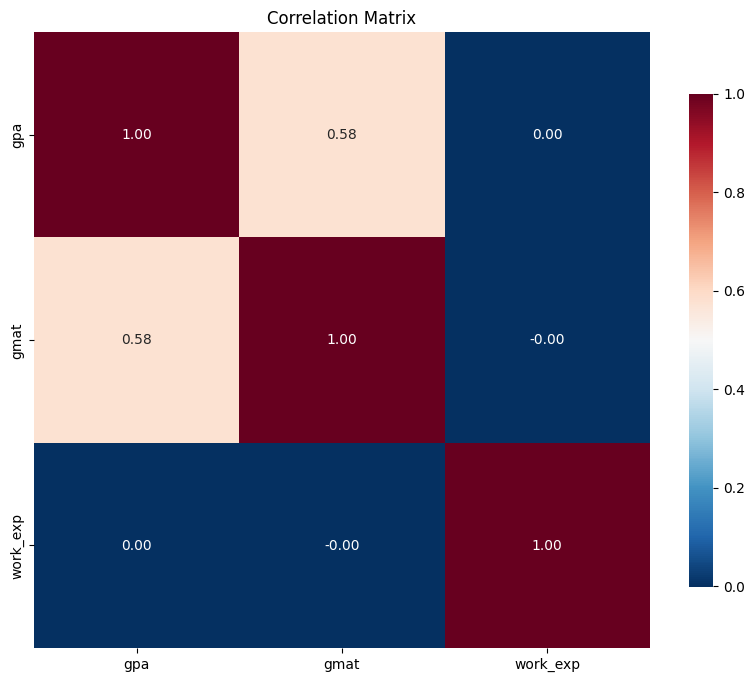

In [106]:
numeric_data = data.select_dtypes(include=[float, int])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True ,fmt=".2f", cmap='RdBu_r', square=True, cbar_kws={"shrink": .8})

plt.title('Correlation Matrix')
plt.show()

### 2. Categorical & Categorical
#### chi square tests

In [115]:
def chi_square_test(col1, col2):
    contingency_table = pd.crosstab(data[col1], data[col2]) 
    chi2, p, dof, expected = chi2_contingency(contingency_table)  
    print(f'Chi-square value for {col1} and {col2} : {chi2}')
    print(f'p-value: {p}')

# Chi-square test for different combinations of categorical variables
    
chi_square_test('gender', 'international')
chi_square_test('gender', 'major')
chi_square_test('gender', 'race')
chi_square_test('gender', 'work_industry')
chi_square_test('gender', 'admission')
chi_square_test('international', 'major')
chi_square_test('international', 'race')
chi_square_test('international', 'work_industry')
chi_square_test('international', 'admission')
chi_square_test('major', 'race')
chi_square_test('major', 'work_industry')
chi_square_test('major', 'admission')
chi_square_test('race', 'work_industry')
chi_square_test('race', 'admission')
chi_square_test('work_industry', 'admission')

Chi-square value for gender and international : 0.3281806812197476
p-value: 0.5667323377403803
Chi-square value for gender and major : 4.474129497151208
p-value: 0.10677144591222713
Chi-square value for gender and race : 0.854040866260909
p-value: 0.9310597962414499
Chi-square value for gender and work_industry : 11.432356035055243
p-value: 0.5746463023534557
Chi-square value for gender and admission : 0.0
p-value: 1.0
Chi-square value for international and major : 1.2465315016104628
p-value: 0.53619051061747
Chi-square value for international and race : 0.0
p-value: 1.0
Chi-square value for international and work_industry : 5.555801025940184
p-value: 0.9608383039984122
Chi-square value for international and admission : 0.004691839951955529
p-value: 0.9453900026431273
Chi-square value for major and race : 6.038053173274344
p-value: 0.6429692233774154
Chi-square value for major and work_industry : 21.68781447790691
p-value: 0.7056503903537898
Chi-square value for major and admission : 3

### 3. Categorical & Numerical analysis
#### Boxplots

##### Boxplot for GMAT score range of each work industry

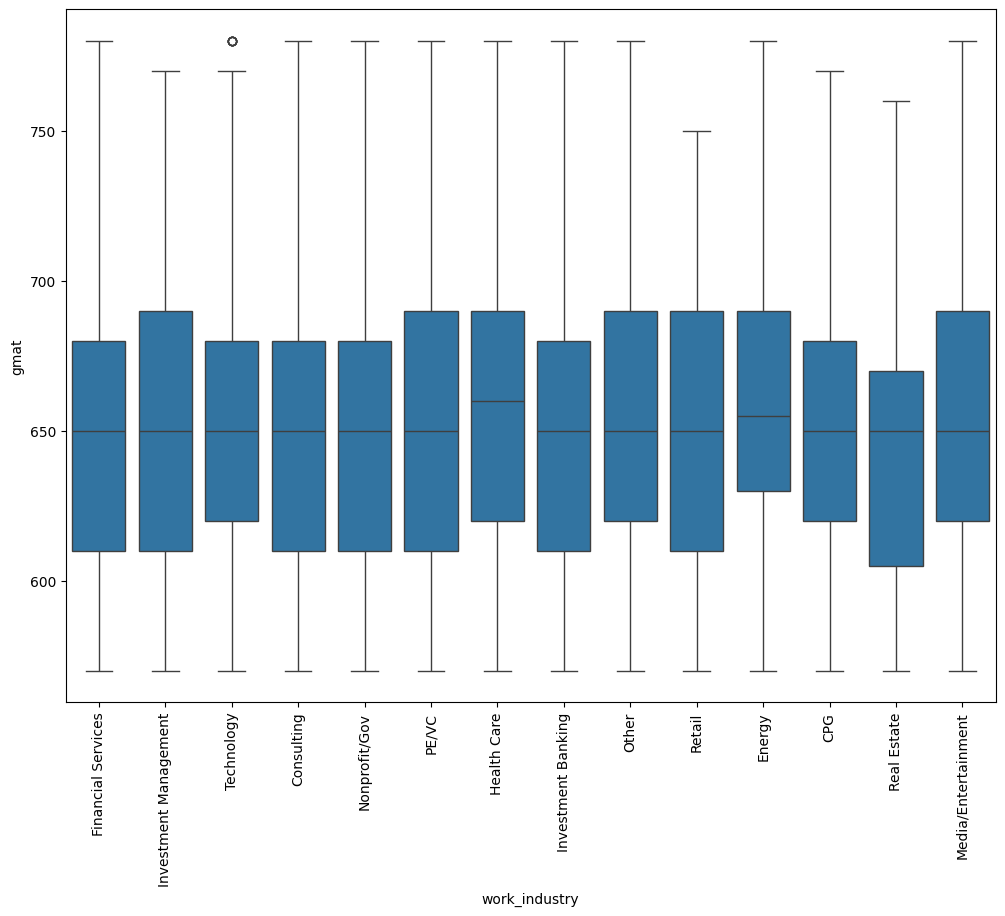

In [107]:
plt.figure(figsize=(12,9))
sns.boxplot(x='work_industry',y='gmat',data=data)
plt.xticks(rotation=90)
plt.show()

#### Boxplot for GMAT score by race 

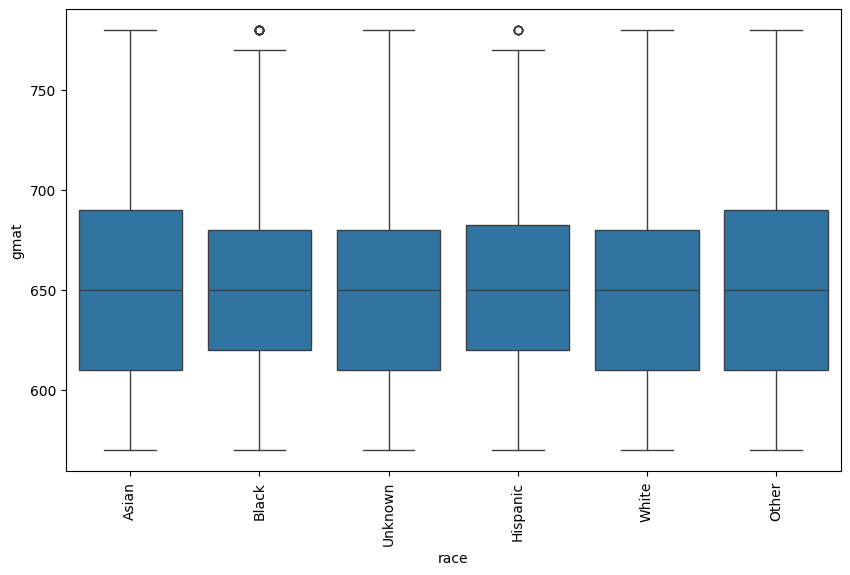

In [108]:
plt.figure(figsize=(10,6))
sns.boxplot(x='race',y='gmat',data=data)
plt.xticks(rotation=90)
plt.show()

#### Boxplot for GMAT score by gender

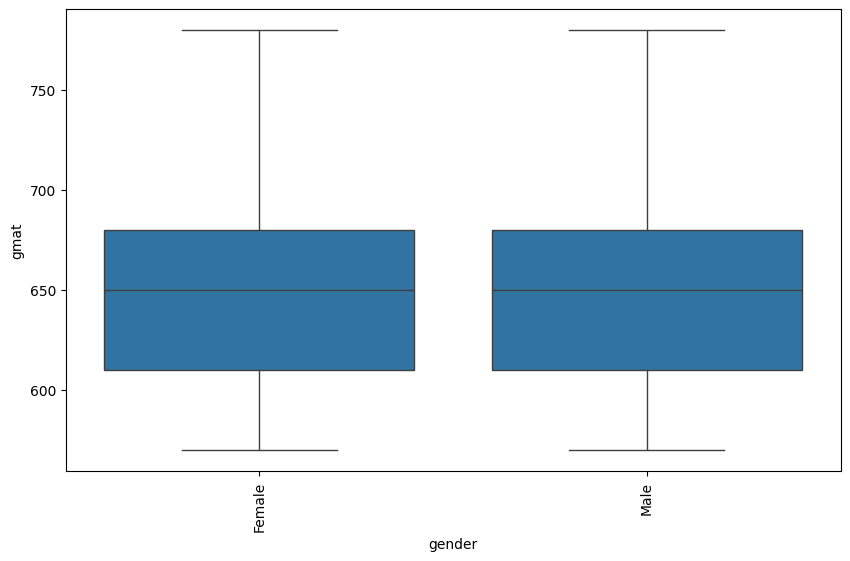

In [109]:
plt.figure(figsize=(10,6))
sns.boxplot(x='gender',y='gmat',data=data)
plt.xticks(rotation=90)
plt.show()

#### Boxplot for industry work experience of workers

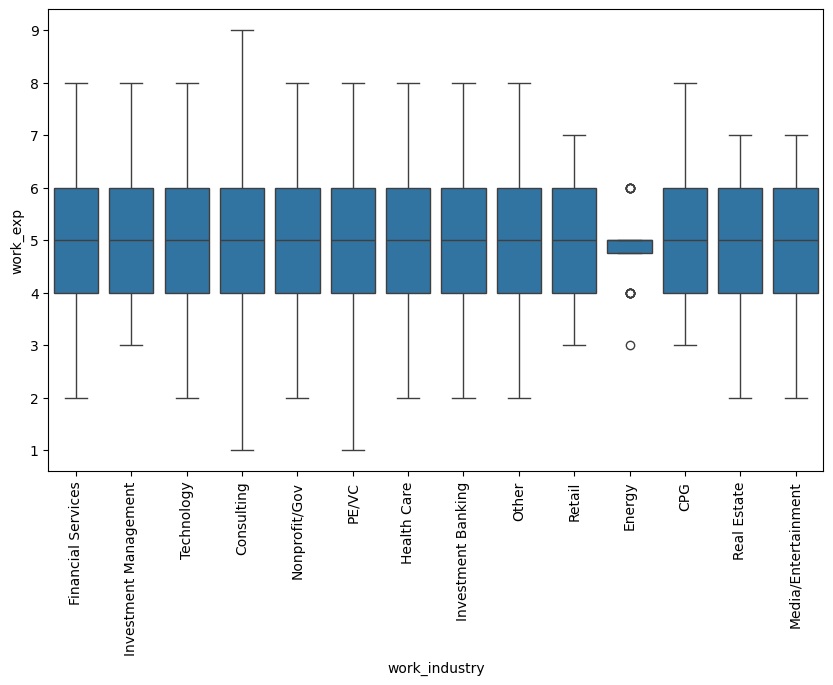

In [110]:
plt.figure(figsize=(10,6))
sns.boxplot(x='work_industry',y='work_exp',data=data)
plt.xticks(rotation=90)
plt.show()